# Installations

In [1]:
!pip install textblob

# Commit to GitHub

In [31]:
!pwd                # shows your current folder
!git status         # check uncommitted changes
!git add .
!git commit -m "Complete Pipleline Merge"
!git push origin main

'pwd' is not recognized as an internal or external command,
operable program or batch file.


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


[main fbfa05f] Complete Pipleline Merge
 3 files changed, 6788 insertions(+), 2 deletions(-)
 create mode 100644 .ipynb_checkpoints/Complete_Pipeline-checkpoint.ipynb
 create mode 100644 Complete_Pipeline.ipynb


To https://github.com/Starlight0901/Reddit_SriLanka_Social_Insight.git
   adcbed7..fbfa05f  main -> main


# Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk import ngrams
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tharu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory Data Analysis

In [4]:
# Load dataset
df_posts = pd.read_csv("Final_Posts_Data.csv")
df_posts.head()

C:\Users\tharu\AppData\Local\Temp\ipykernel_40380\3966237626.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_posts = pd.read_csv("Final_Posts_Data.csv")


,type,source,keyword,id,created_utc,author,subreddit,content,score,num_comments,parent_post
0,post,new,NaN,1otaemb,1.762771e+09,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,NaN
1,post,new,NaN,1otaam5,1.762770e+09,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,NaN
2,post,new,NaN,1ot9w1v,1.762769e+09,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,NaN
3,post,new,NaN,1ot9kwe,1.762768e+09,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,NaN
4,post,new,NaN,1ot9h2f,1.762767e+09,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,NaN


In [5]:
# Dataset overview
print("Dataset shape:", df_posts.shape)

Dataset shape: (70861, 11)


In [6]:
print("\nColumns:", df_posts.columns)


Columns: Index(['type', 'source', 'keyword', 'id', 'created_utc', 'author', 'subreddit',
       'content', 'score', 'num_comments', 'parent_post'],
      dtype='object')


In [7]:
print("\nData types:\n", df_posts.dtypes)


Data types:
 type             object
source           object
keyword          object
id               object
created_utc     float64
author           object
subreddit        object
content          object
score           float64
num_comments    float64
parent_post      object
dtype: object


In [8]:
print("\nMissing values per column:\n", df_posts.isnull().sum())


Missing values per column:
 type                0
source              0
keyword         53250
id                  0
created_utc         0
author           2981
subreddit           0
content             1
score               8
num_comments    52021
parent_post     18848
dtype: int64


In [9]:
# Number of posts
num_posts = len(df_posts)
print("Total number of posts:", num_posts)

# Number of unique authors
num_authors = df_posts['author'].nunique()
print("Number of unique authors:", num_authors)

# Number of subreddits (should be 1 for r/srilanka)
num_subreddits = df_posts['subreddit'].nunique()
print("Subreddits in dataset:", df_posts['subreddit'].unique())


Total number of posts: 70861
Number of unique authors: 15269
Subreddits in dataset: ['srilanka']


In [10]:
# Compute number of words in each post
df_posts['word_count'] = df_posts['content'].apply(lambda x: len(str(x).split()))
df_posts['char_count'] = df_posts['content'].apply(lambda x: len(str(x)))

# Summary statistics
print(df_posts[['word_count', 'char_count']].describe()) 

         word_count    char_count
count  70861.000000  70861.000000
mean      63.012828    359.557994
std       97.379429    570.105912
min        1.000000      3.000000
25%       15.000000     82.000000
50%       33.000000    187.000000
75%       74.000000    418.000000
max     4276.000000  24325.000000


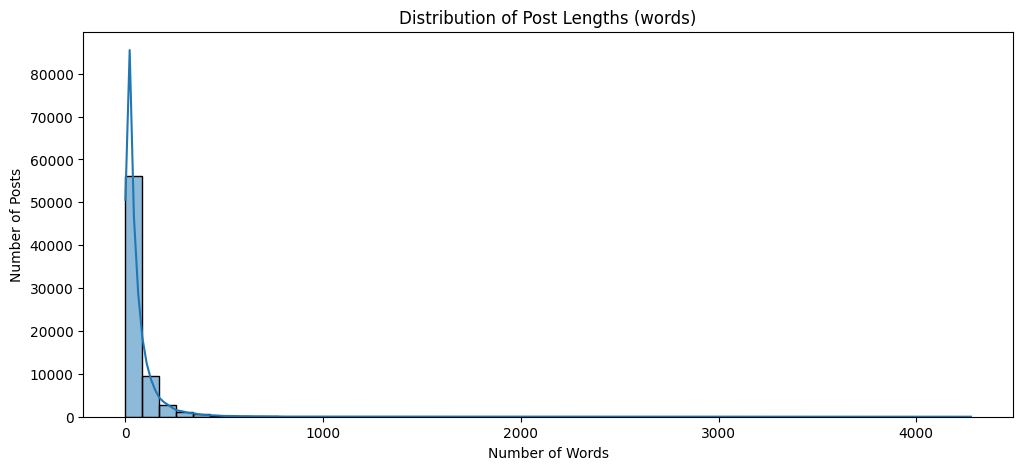

In [11]:
plt.figure(figsize=(12,5))
sns.histplot(df_posts['word_count'], bins=50, kde=True)
plt.title("Distribution of Post Lengths (words)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Posts")
plt.show()

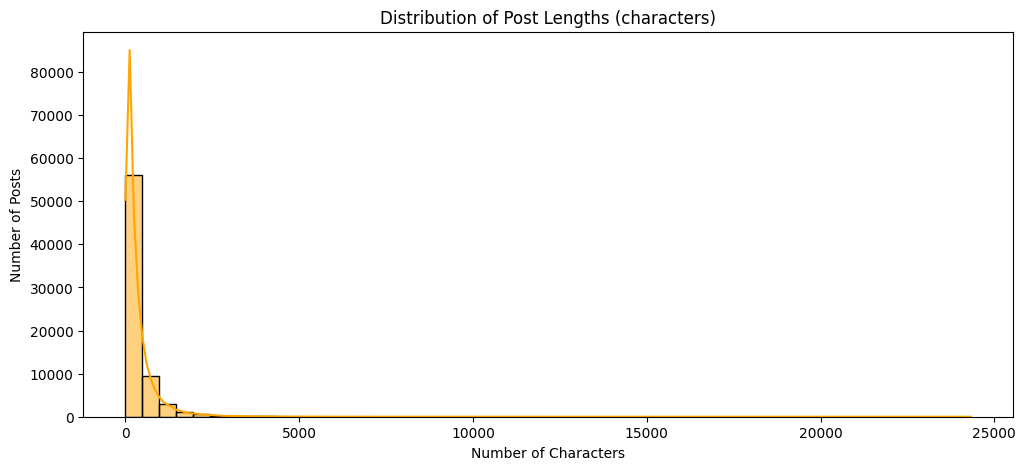

In [12]:
plt.figure(figsize=(12,5))
sns.histplot(df_posts['char_count'], bins=50, kde=True, color='orange')
plt.title("Distribution of Post Lengths (characters)")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Posts")
plt.show()


In [13]:
from collections import Counter
import re

# Combine all text
all_text = " ".join(df_posts['content'].dropna()).lower()

# Basic tokenization: split by non-alphanumeric
tokens = re.findall(r'\b\w+\b', all_text)

# Count frequency
word_freq = Counter(tokens)
most_common_words = word_freq.most_common(20)
print("Most common words:\n", most_common_words)


Most common words:
 [('the', 165507), ('to', 130421), ('and', 109056), ('a', 106003), ('i', 105299), ('in', 73763), ('of', 67569), ('is', 61432), ('it', 58816), ('for', 55983), ('you', 55112), ('that', 44175), ('this', 36207), ('s', 35179), ('are', 34742), ('t', 31852), ('have', 31108), ('but', 29853), ('they', 28546), ('on', 28230)]


In [14]:
# Remove stopwords
tokens_no_stop = [word for word in tokens if word not in stop_words]

# Count frequency
word_freq = Counter(tokens_no_stop)
most_common_words = word_freq.most_common(20)
print("Most common words (stopwords removed):\n", most_common_words)


Most common words (stopwords removed):
 [('sri', 22420), ('like', 18928), ('people', 16446), ('lanka', 16388), ('get', 14498), ('would', 12489), ('know', 10874), ('good', 10719), ('one', 10516), ('even', 10426), ('also', 10060), ('time', 9488), ('think', 8014), ('go', 7755), ('country', 7553), ('need', 7374), ('want', 6771), ('much', 6476), ('https', 6314), ('really', 6196)]


C:\Users\tharu\AppData\Local\Temp\ipykernel_40380\1289054692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


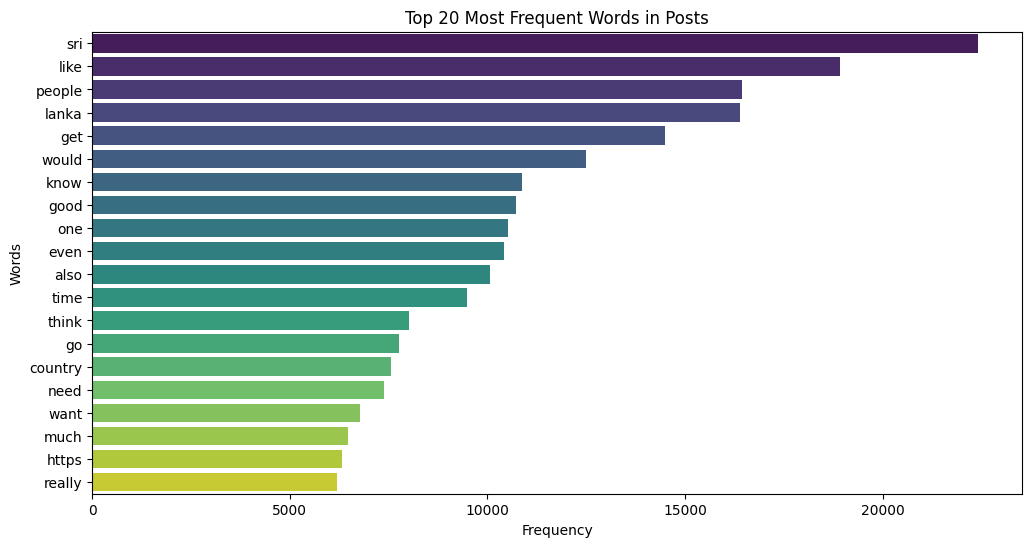

In [15]:
words, counts = zip(*most_common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 20 Most Frequent Words in Posts")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

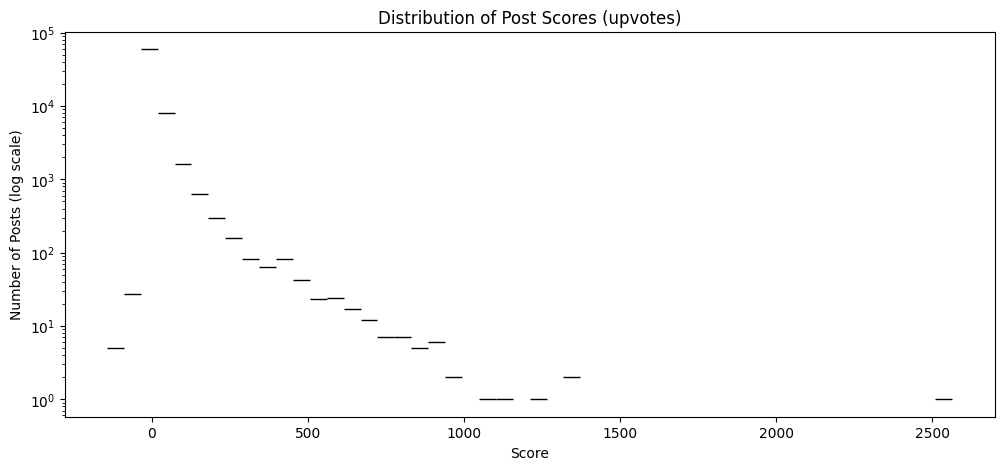

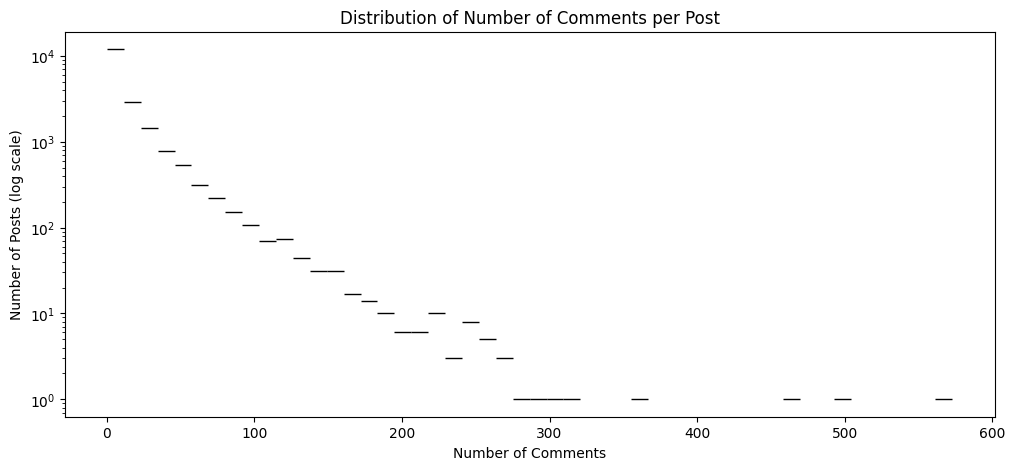

In [16]:
# Score (upvotes)
plt.figure(figsize=(12,5))
sns.histplot(df_posts['score'], bins=50, log_scale=(False, True))
plt.title("Distribution of Post Scores (upvotes)")
plt.xlabel("Score")
plt.ylabel("Number of Posts (log scale)")
plt.show()

# Number of comments
plt.figure(figsize=(12,5))
sns.histplot(df_posts['num_comments'], bins=50, log_scale=(False, True), color='green')
plt.title("Distribution of Number of Comments per Post")
plt.xlabel("Number of Comments")
plt.ylabel("Number of Posts (log scale)")
plt.show()


C:\Users\tharu\AppData\Local\Temp\ipykernel_40380\293382391.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette="coolwarm")


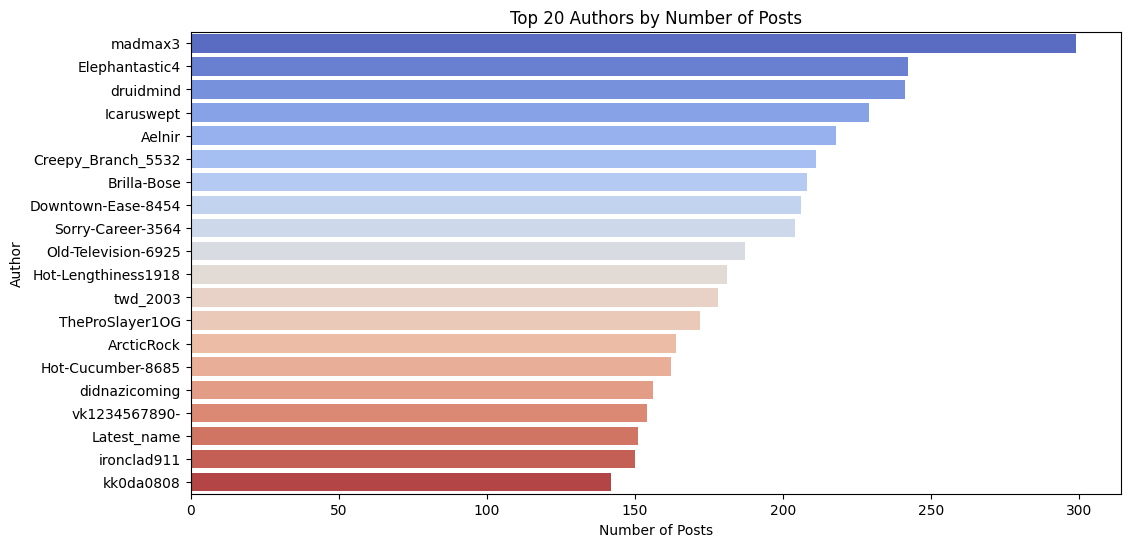

In [17]:
# Top 20 authors by number of posts
top_authors = df_posts['author'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="coolwarm")
plt.title("Top 20 Authors by Number of Posts")
plt.xlabel("Number of Posts")
plt.ylabel("Author")
plt.show()

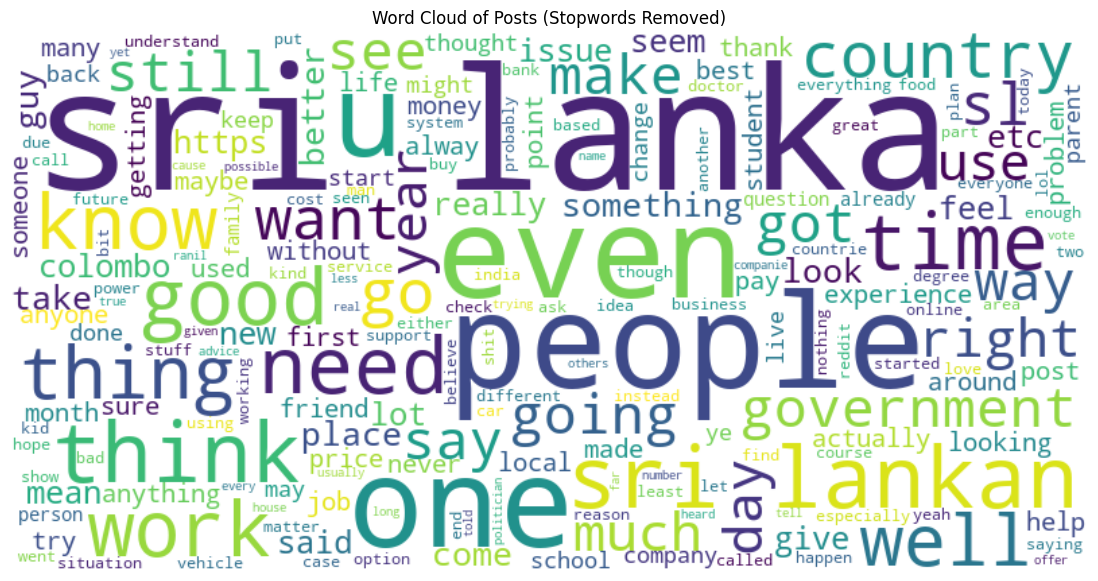

In [18]:
# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens_no_stop))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Posts (Stopwords Removed)")
plt.show()

In [19]:
# Bigram / Trigram Analysis

from nltk import ngrams

def get_top_ngrams(tokens, n=2, top_k=20):
    ngram_list = list(ngrams(tokens, n))
    ngram_freq = Counter(ngram_list)
    return ngram_freq.most_common(top_k)

top_bigrams = get_top_ngrams(tokens_no_stop, n=2)
top_trigrams = get_top_ngrams(tokens_no_stop, n=3)

print("\nTop 20 Bigrams:", top_bigrams)
print("\nTop 20 Trigrams:", top_trigrams)


Top 20 Bigrams: [(('sri', 'lanka'), 15846), (('sri', 'lankan'), 4689), (('https', 'www'), 3119), (('sri', 'lankans'), 1622), (('reddit', 'com'), 887), (('thanks', 'advance'), 873), (('feel', 'like'), 847), (('social', 'media'), 834), (('would', 'like'), 824), (('www', 'reddit'), 791), (('_', '_'), 713), (('anyone', 'know'), 699), (('even', 'though'), 661), (('make', 'sure'), 622), (('would', 'love'), 613), (('long', 'term'), 601), (('let', 'know'), 579), (('https', 'preview'), 568), (('preview', 'redd'), 568), (('auto', 'webp'), 568)]

Top 20 Trigrams: [(('www', 'reddit', 'com'), 778), (('https', 'www', 'reddit'), 770), (('_', '_', '_'), 697), (('https', 'preview', 'redd'), 568), (('reddit', 'com', 'r'), 548), (('format', 'png', 'auto'), 375), (('png', 'auto', 'webp'), 375), (('com', 'r', 'srilanka'), 356), (('r', 'srilanka', 'comments'), 294), (('www', 'youtube', 'com'), 283), (('https', 'www', 'youtube'), 270), (('en', 'wikipedia', 'org'), 270), (('wikipedia', 'org', 'wiki'), 270), 

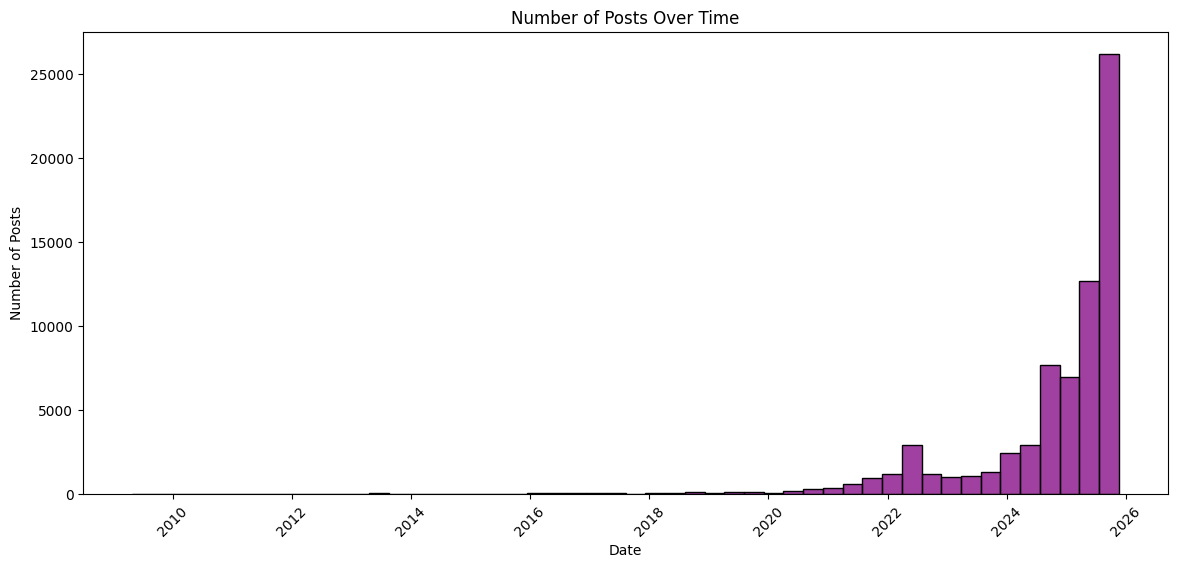

In [20]:
import matplotlib.dates as mdates
# Temporal Analysis

# Convert timestamp to datetime
df_posts['created_utc'] = pd.to_datetime(df_posts['created_utc'], unit='s')

plt.figure(figsize=(14,6))
sns.histplot(df_posts['created_utc'], bins=50, kde=False, color='purple')
plt.title("Number of Posts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.show() 

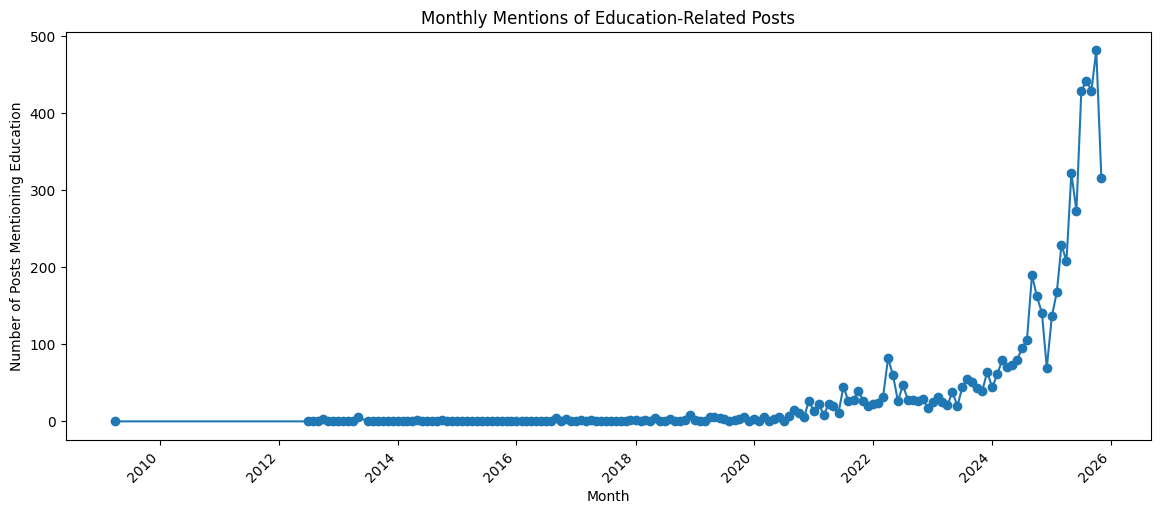

In [24]:
# Ensure created_utc is datetime
df_posts['created_utc'] = pd.to_datetime(df_posts['created_utc'], errors='coerce')

# Fix education_mention (MUST include na=False)
df_posts['education_mention'] = (
    df_posts['content']
    .astype(str)
    .str.lower()
    .str.contains('education|school|university|teacher|exam', regex=True, na=False)
)

# Fix month field
df_posts['month'] = df_posts['created_utc'].dt.to_period('M')

# Group and plot
monthly_edu = df_posts.groupby('month')['education_mention'].sum()

# Convert period index → timestamp for plotting
monthly_edu.index = monthly_edu.index.to_timestamp()

plt.figure(figsize=(14,6))
monthly_edu.plot(marker='o')
plt.title("Monthly Mentions of Education-Related Posts")
plt.xlabel("Month")
plt.ylabel("Number of Posts Mentioning Education")
plt.xticks(rotation=45)
plt.show()

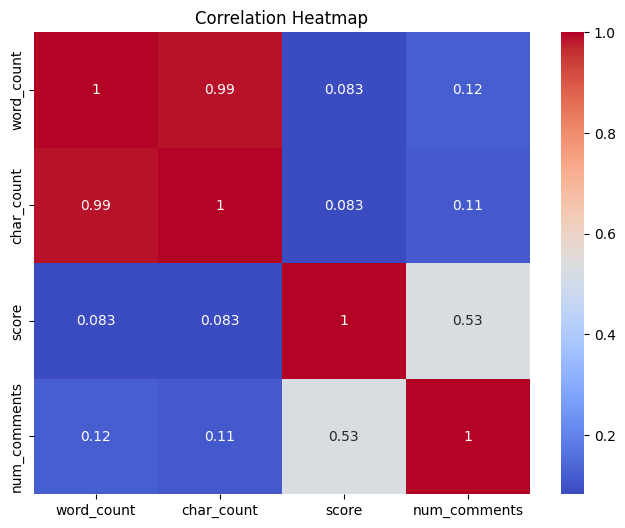

In [25]:
# Correlation Analysis
plt.figure(figsize=(8,6))
sns.heatmap(df_posts[['word_count','char_count','score','num_comments']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [26]:
# Preliminary Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

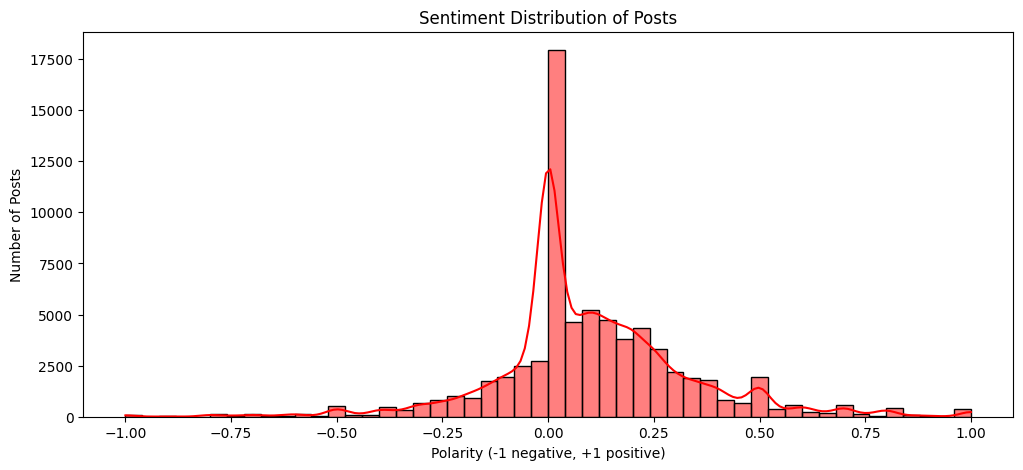

In [27]:
df_posts['sentiment'] = df_posts['content'].apply(get_sentiment)

plt.figure(figsize=(12,5))
sns.histplot(df_posts['sentiment'], bins=50, kde=True, color='red')
plt.title("Sentiment Distribution of Posts")
plt.xlabel("Polarity (-1 negative, +1 positive)")
plt.ylabel("Number of Posts")
plt.show()

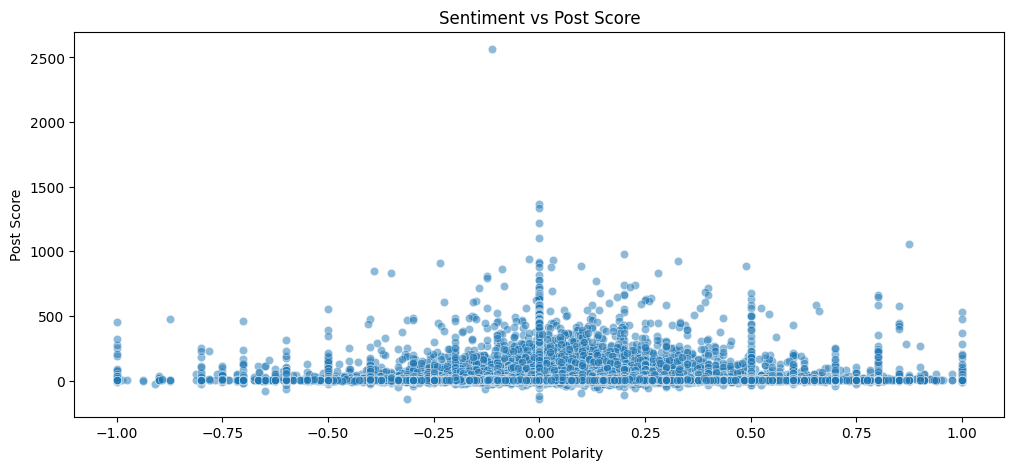

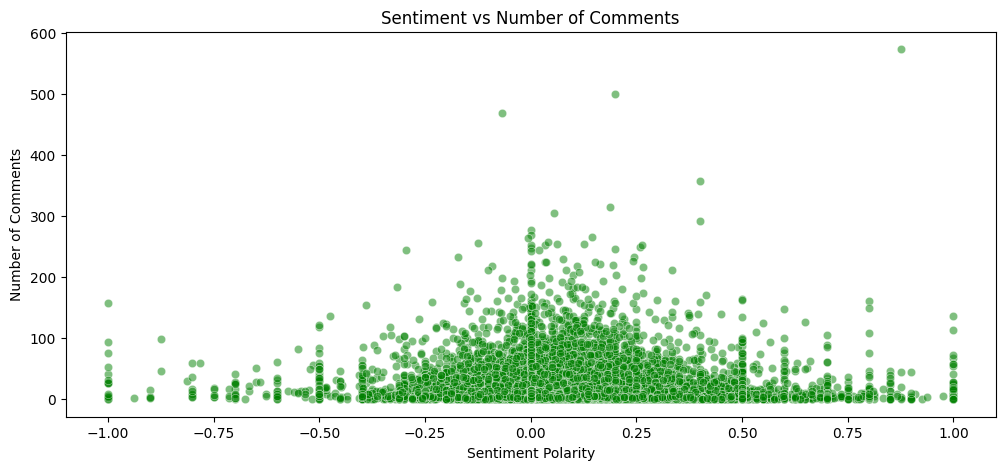

In [28]:
# Sentiment vs score/comments
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_posts, x='sentiment', y='score', alpha=0.5)
plt.title("Sentiment vs Post Score")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Post Score")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(data=df_posts, x='sentiment', y='num_comments', alpha=0.5, color='green')
plt.title("Sentiment vs Number of Comments")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Comments")
plt.show()


In [29]:
df_posts.head()

,type,source,keyword,id,created_utc,author,subreddit,content,score,num_comments,parent_post,word_count,char_count,education_mention,month,sentiment
0,post,new,NaN,1otaemb,2025-11-10 10:33:16,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,NaN,71,366,False,2025-11,0.233333
1,post,new,NaN,1otaam5,2025-11-10 10:26:02,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,NaN,146,1016,False,2025-11,0.235771
2,post,new,NaN,1ot9w1v,2025-11-10 10:00:29,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,NaN,15,70,False,2025-11,0.250000
3,post,new,NaN,1ot9kwe,2025-11-10 09:40:57,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,NaN,7,33,False,2025-11,0.200000
4,post,new,NaN,1ot9h2f,2025-11-10 09:33:57,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,NaN,147,928,False,2025-11,0.185000
